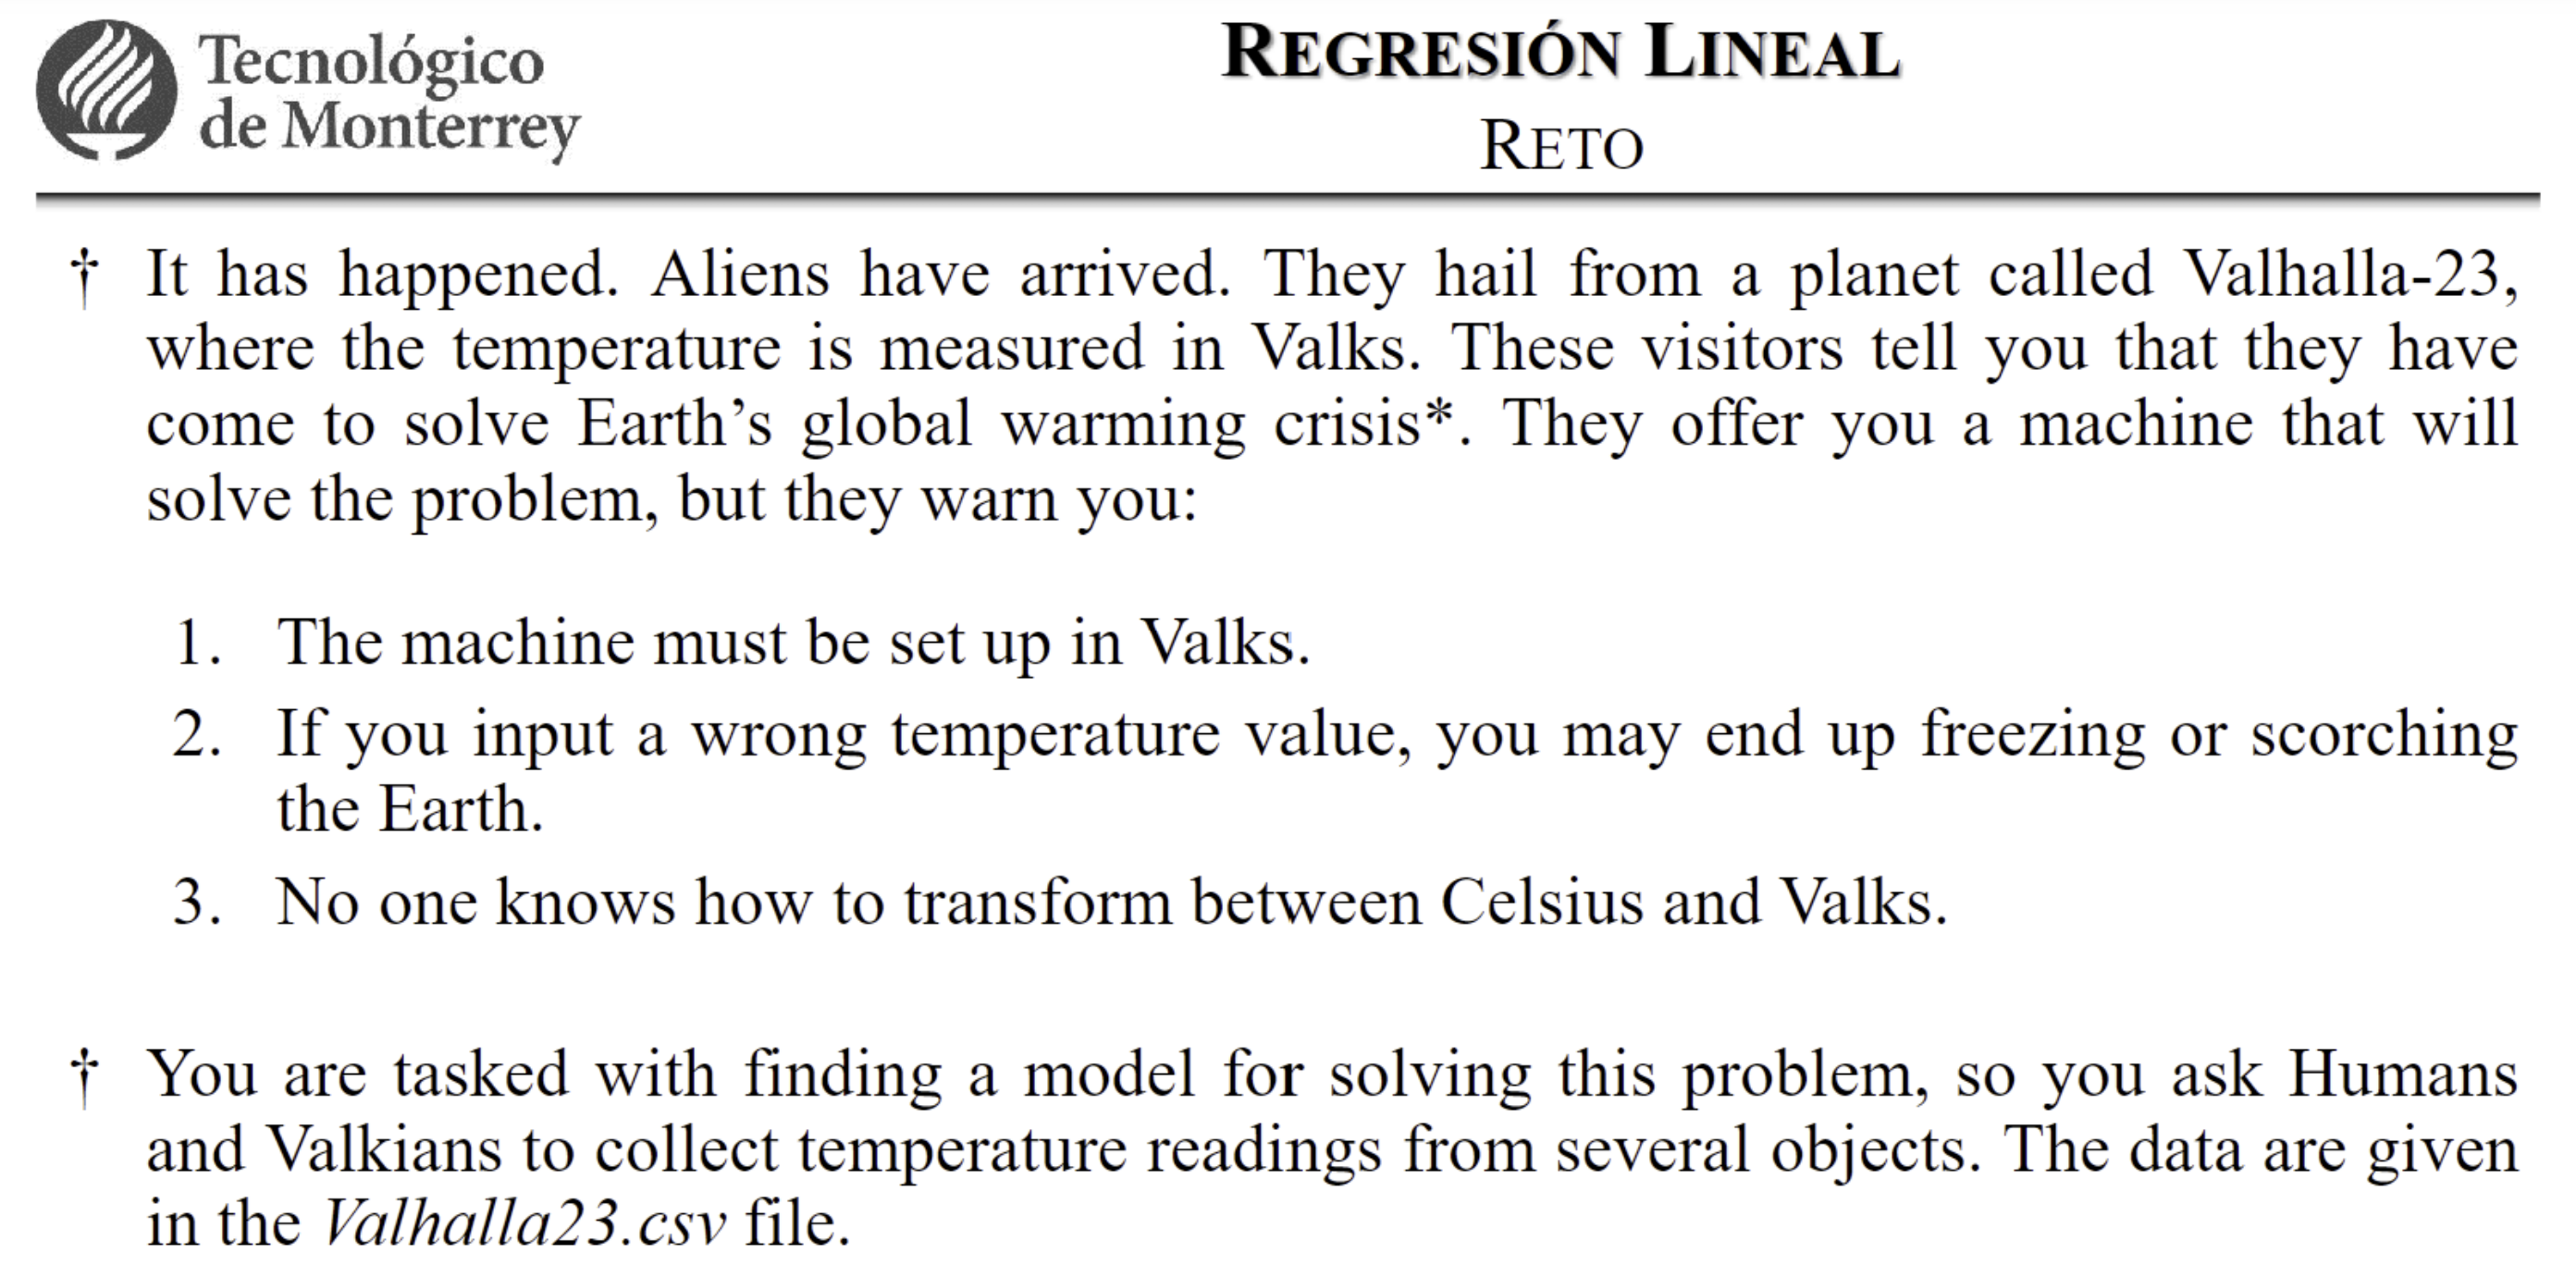

# Importar librerías y módulos

In [1]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np

In [2]:
# Leer el archivo CSV
df = pd.read_csv('valhalla23.csv')

df.head()

,Celsius,Valks
0,61.4720,-139.740
1,70.5790,-156.600
2,-7.3013,73.269
3,71.3380,-165.420
4,43.2360,-75.835


# Separar datos en subconjuntos (usando train_test_split)

In [3]:
# Suponiendo que tu DataFrame se llama df
y = df['Valks']  # Asegúrate de que X sea un DataFrame de una sola columna
X = df[['Celsius']]  # y es una Serie

# Dividir los datos en subconjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo

## Crear objeto del modelo LinearRegression

In [4]:
# Crear el objeto del modelo
LR_model = LinearRegression()

## Crear objeto del modelo SGDRegressor con GridSearchCV

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import make_scorer, mean_squared_error

# Define los parámetros a explorar
param_grid = {
    'alpha': [0.00001, 0.0001, 0.001],
    'eta0': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'max_iter': [100000, 1000000],
    'tol': [1e-3, 1e-4],
}

# Crear el modelo SGDRegressor
sgd = SGDRegressor(
    loss='squared_error', 
    penalty='l2', 
    l1_ratio=0.15, 
    fit_intercept=True, 
    shuffle=True, 
    verbose=0, 
    epsilon=0.1, 
    random_state=42
)

# Crear el GridSearchCV
grid_search = GridSearchCV(
    estimator=sgd, 
    param_grid=param_grid, 
    scoring=make_scorer(mean_squared_error, greater_is_better=False), 
    cv=5,  # Validación cruzada 5-fold
    n_jobs=1  # Ejecuta un solo trabajo en lugar de múltiples en paralelo
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Usar método fit para ajustar los modelos a los datos de entrenamiento

### LinearRegression

In [6]:
# Ajustar el modelo a los datos de entrenamiento
LR_model.fit(X_train, y_train)

LinearRegression()

### SGDRegressor

In [7]:
# Ejecutar el grid search
grid_search.fit(X_train_scaled, y_train)

# Mostrar los mejores parámetros encontrados
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best MSE: {-grid_search.best_score_}")

# Usar el mejor modelo encontrado para hacer predicciones
SGD_model = grid_search.best_estimator_

Best parameters found: {'alpha': 0.0001, 'eta0': 0.01, 'learning_rate': 'constant', 'max_iter': 100000, 'tol': 0.001}
Best MSE: 51.85373248625801


# Analizar el desempeño

## Opción 1: Usando método score del modelo

### LinearRegression

In [8]:
# Usar el método score para evaluar el modelo
train_score = LR_model.score(X_train, y_train)
test_score = LR_model.score(X_test, y_test)

print(f"Puntaje en el conjunto de entrenamiento: {train_score:.4f}")
print(f"Puntaje en el conjunto de prueba: {test_score:.4f}")

Puntaje en el conjunto de entrenamiento: 0.9930
Puntaje en el conjunto de prueba: 0.9976


### SGDRegressor

In [9]:
# Usar el método score para evaluar el modelo
train_score = SGD_model.score(X_train_scaled, y_train)
test_score = SGD_model.score(X_test_scaled, y_test)

print(f"Puntaje en el conjunto de entrenamiento: {train_score:.4f}")
print(f"Puntaje en el conjunto de prueba: {test_score:.4f}")

Puntaje en el conjunto de entrenamiento: 0.9930
Puntaje en el conjunto de prueba: 0.9976


## Opción 2: Haciendo predicciones y utilizando módulo de métricas

### LinearRegression

In [10]:
from sklearn import metrics

# Hacer predicciones en los datos de prueba
y_pred = LR_model.predict(X_train)

# Calcular métricas de evaluación
mse = metrics.mean_squared_error(y_train, y_pred)
r2 = metrics.r2_score(y_train, y_pred)

print('Conjunto de Entrenamiento:')
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Coeficiente de Determinación (R^2): {r2:.4f}")


# Hacer predicciones en los datos de prueba
y_pred = LR_model.predict(X_test)

# Calcular métricas de evaluación
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print('')
print('Conjunto de Prueba:')
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Coeficiente de Determinación (R^2): {r2:.4f}")

Conjunto de Entrenamiento:
Error Cuadrático Medio (MSE): 50.4882
Coeficiente de Determinación (R^2): 0.9930

Conjunto de Prueba:
Error Cuadrático Medio (MSE): 20.1881
Coeficiente de Determinación (R^2): 0.9976


### SGDRgressor

In [11]:
# Hacer predicciones en los datos de prueba
y_pred_best = SGD_model.predict(X_train_scaled)

# Calcular métricas de evaluación
mse = metrics.mean_squared_error(y_train, y_pred_best)
r2 = metrics.r2_score(y_train, y_pred_best)

print('Conjunto de Entrenamiento:')
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Coeficiente de Determinación (R^2): {r2:.4f}")


# Hacer predicciones en los datos de prueba
y_pred_best = SGD_model.predict(X_test_scaled)

# Calcular métricas de evaluación
mse = metrics.mean_squared_error(y_test, y_pred_best)
r2 = metrics.r2_score(y_test, y_pred_best)

print('')
print('Conjunto de Prueba:')
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Coeficiente de Determinación (R^2): {r2:.4f}")

Conjunto de Entrenamiento:
Error Cuadrático Medio (MSE): 50.4965
Coeficiente de Determinación (R^2): 0.9930

Conjunto de Prueba:
Error Cuadrático Medio (MSE): 20.0270
Coeficiente de Determinación (R^2): 0.9976


# Visualización de valores predichos para LinearRegression y SGDRegressor

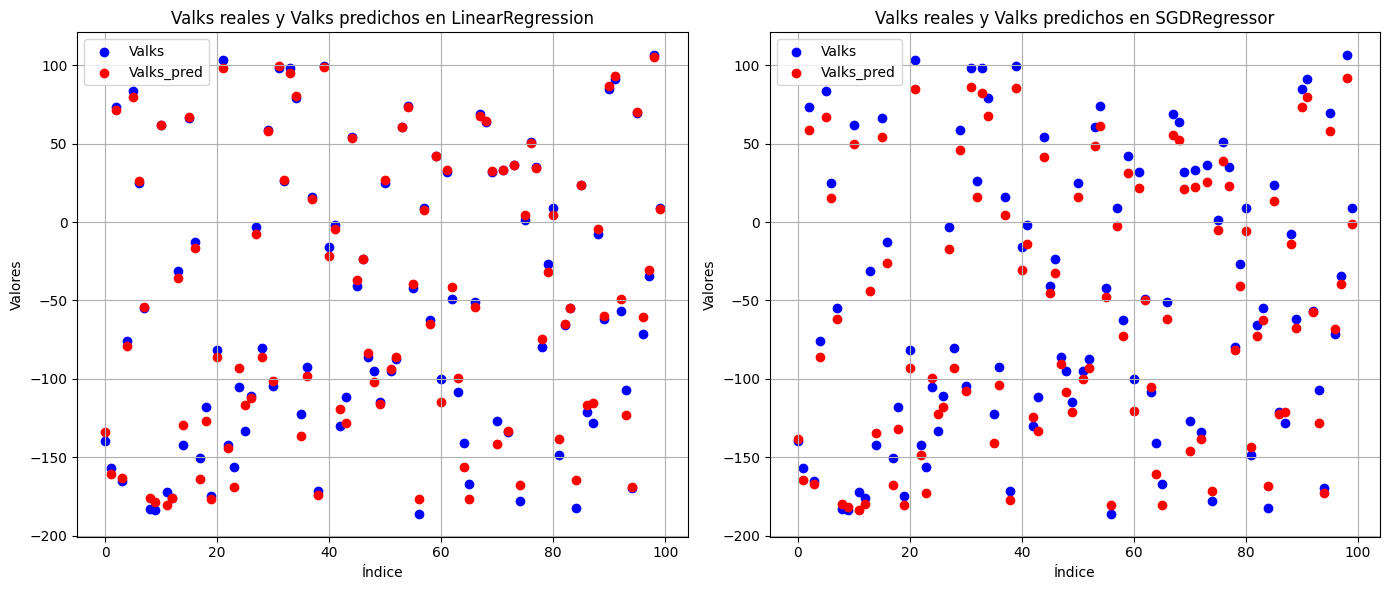

In [12]:
import matplotlib.pyplot as plt

df['Valks_pred_LR'] = LR_model.predict(df[['Celsius']]) #linearRegression
df['Valks_pred_SGD'] = SGD_model.predict(scaler.fit_transform(df[['Celsius']])) #SGDRegressor

# Crear la figura y los ejes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de LinearRegressor
ax1.scatter(df.index, df['Valks'], label='Valks', color='blue')
ax1.scatter(df.index, df['Valks_pred_LR'], label='Valks_pred', color='red')
ax1.set_xlabel('Índice')
ax1.set_ylabel('Valores')
ax1.set_title('Valks reales y Valks predichos en LinearRegression')
ax1.legend()
ax1.grid(True)

# Gráfico de SGDRegressor
ax2.scatter(df.index, df['Valks'], label='Valks', color='blue')
ax2.scatter(df.index, df['Valks_pred_SGD'], label='Valks_pred', color='red')
ax2.set_xlabel('Índice')
ax2.set_ylabel('Valores')
ax2.set_title('Valks reales y Valks predichos en SGDRegressor')
ax2.legend()
ax2.grid(True)

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar las gráficas
plt.show()

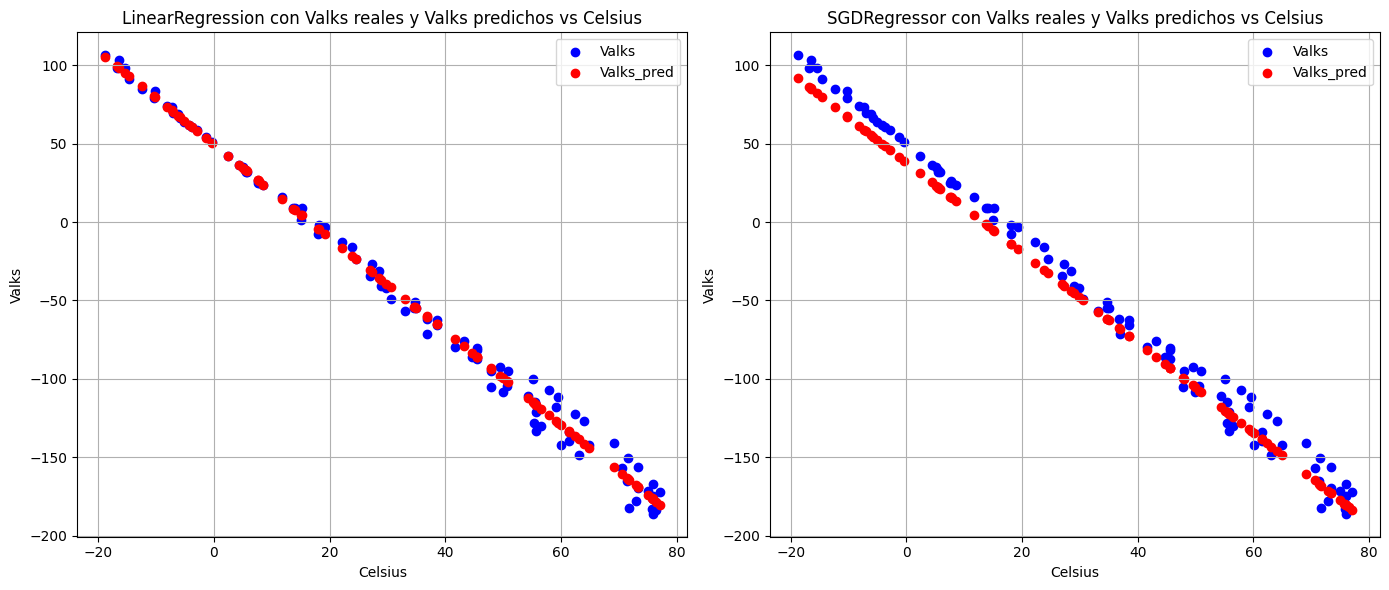

In [13]:
# Crear la figura y los ejes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de LinearRegressor
ax1.scatter(df['Celsius'], df['Valks'], label='Valks', color='blue')
ax1.scatter(df['Celsius'], df['Valks_pred_LR'], label='Valks_pred', color='red')
ax1.set_xlabel('Celsius')
ax1.set_ylabel('Valks')
ax1.set_title('LinearRegression con Valks reales y Valks predichos vs Celsius')
ax1.legend()
ax1.grid(True)

# Gráfico de SGDRegressor
ax2.scatter(df['Celsius'], df['Valks'], label='Valks', color='blue')
ax2.scatter(df['Celsius'], df['Valks_pred_SGD'], label='Valks_pred', color='red')
ax2.set_xlabel('Celsius')
ax2.set_ylabel('Valks')
ax2.set_title('SGDRegressor con Valks reales y Valks predichos vs Celsius')
ax2.legend()
ax2.grid(True)

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar las gráficas
plt.show()

# Conclusiones

Viendo los resultados obtenidos se puede visaulizar que el modelo que mejor funcionó fue el de LinearRegression ya que hay una relación lineal entre las variable Celsius y la variable Valks. El modelo de SGDRegressor también funcionó muy bien al tener errores mínimos y un R2 alto pero el modelo de LinearRegression le supera por poco. Tal vez buscando mejores parámetros para SGDRegressor se podría mejor sus precisión.